# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`


In [ ]:
!pip install pycaret

In [1]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

# 🚀 Quick start

In [56]:
import pandas as pd

df = pd.read_csv("/content/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [49]:
df[" loan_status"].value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


In [50]:
df.columns


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [53]:
df.drop(columns=["loan_id"] , inplace=True)

In [52]:
df[" loan_status"].map({"Approved":1 , "Rejected":0})

,loan_status
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4264,NaN
4265,NaN
4266,NaN
4267,NaN


In [54]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df[' loan_status']= label_encoder.fit_transform(df[' loan_status'])

df[' loan_status'].unique()

array([0, 1])

In [55]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [57]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df, target = ' loan_status', session_id = 123)

# s = setup(data, target = 'Class variable', session_id = 123,normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Target mapping,"Approved: 0, Rejected: 1"
4,Original data shape,"(4269, 13)"
5,Transformed data shape,"(4269, 13)"
6,Transformed train set shape,"(2988, 13)"
7,Transformed test set shape,"(1281, 13)"
8,Numeric features,10
9,Categorical features,2


In [58]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9829,0.9978,0.9829,0.9830,0.9829,0.9636,0.9638,0.1590
lightgbm,Light Gradient Boosting Machine,0.9826,0.9977,0.9826,0.9829,0.9826,0.9629,0.9632,0.3610
rf,Random Forest Classifier,0.9782,0.9969,0.9782,0.9785,0.9782,0.9537,0.9539,0.4450
gbc,Gradient Boosting Classifier,0.9782,0.9965,0.9782,0.9783,0.9782,0.9537,0.9538,0.5890
dt,Decision Tree Classifier,0.9729,0.9716,0.9729,0.9730,0.9729,0.9424,0.9425,0.0790
ada,Ada Boost Classifier,0.9655,0.9929,0.9655,0.9657,0.9655,0.9268,0.9270,0.2680
et,Extra Trees Classifier,0.9612,0.9905,0.9612,0.9614,0.9611,0.9172,0.9175,0.4720
qda,Quadratic Discriminant Analysis,0.9327,0.9766,0.9327,0.9334,0.9329,0.8575,0.8579,0.1320
ridge,Ridge Classifier,0.9240,0.9677,0.9240,0.9263,0.9245,0.8405,0.8419,0.0760
lda,Linear Discriminant Analysis,0.9237,0.9677,0.9237,0.9263,0.9242,0.8400,0.8416,0.0800


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [60]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()

In [64]:
# init setup on exp
s.setup(df, target = ' loan_status', session_id = 123)

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Target mapping,"Approved: 0, Rejected: 1"
4,Original data shape,"(4269, 13)"
5,Transformed data shape,"(4269, 13)"
6,Transformed train set shape,"(2988, 13)"
7,Transformed test set shape,"(1281, 13)"
8,Numeric features,10
9,Categorical features,2


In [65]:
# compare models using OOP
s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9829,0.9978,0.9829,0.9830,0.9829,0.9636,0.9638,0.2480
lightgbm,Light Gradient Boosting Machine,0.9826,0.9977,0.9826,0.9829,0.9826,0.9629,0.9632,0.3050
rf,Random Forest Classifier,0.9782,0.9969,0.9782,0.9785,0.9782,0.9537,0.9539,0.4150
gbc,Gradient Boosting Classifier,0.9782,0.9965,0.9782,0.9783,0.9782,0.9537,0.9538,0.6040
dt,Decision Tree Classifier,0.9729,0.9716,0.9729,0.9730,0.9729,0.9424,0.9425,0.0830
ada,Ada Boost Classifier,0.9655,0.9929,0.9655,0.9657,0.9655,0.9268,0.9270,0.3510
et,Extra Trees Classifier,0.9612,0.9905,0.9612,0.9614,0.9611,0.9172,0.9175,0.3640
qda,Quadratic Discriminant Analysis,0.9327,0.9766,0.9327,0.9334,0.9329,0.8575,0.8579,0.0730
ridge,Ridge Classifier,0.9240,0.9677,0.9240,0.9263,0.9245,0.8405,0.8419,0.0780
lda,Linear Discriminant Analysis,0.9237,0.9677,0.9237,0.9263,0.9242,0.8400,0.8416,0.0780


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

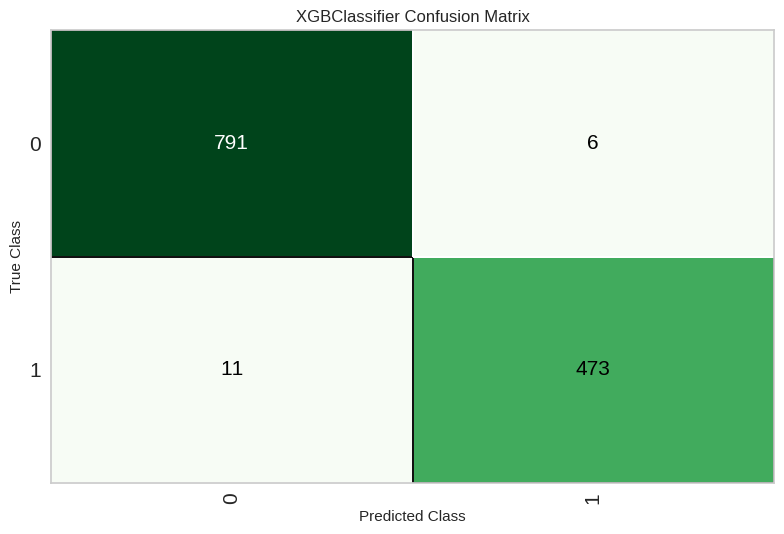

In [66]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

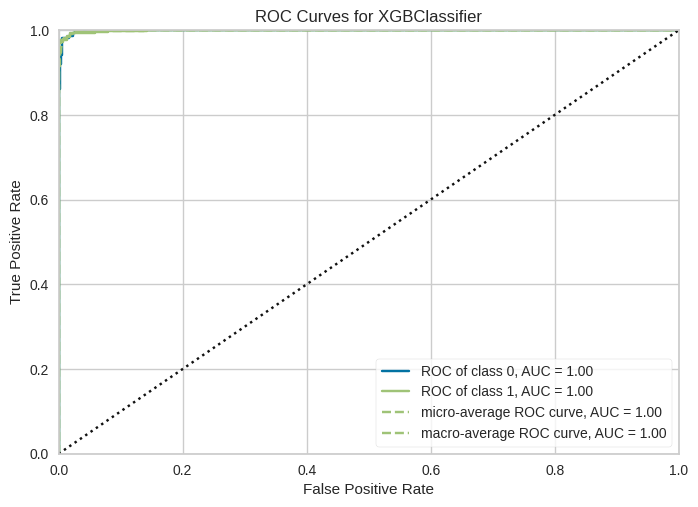

In [67]:
# plot AUC
plot_model(best, plot = 'auc')

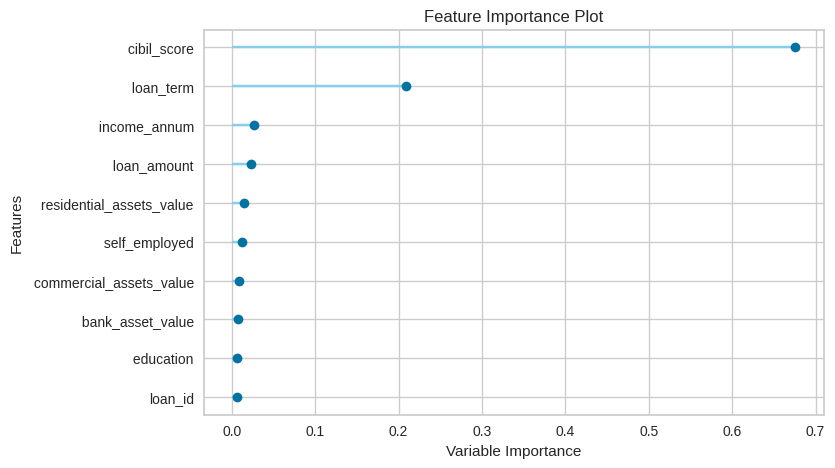

In [68]:
# plot feature importance
plot_model(best, plot = 'feature')

In [70]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [72]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9867,0.9991,0.9867,0.9867,0.9867,0.9717,0.9717


In [73]:
# show predictions df
holdout_pred.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,prediction_label,prediction_score
2798,2799,0,Graduate,No,3600000,12300000,2,300,5200000,3000000,14300000,5400000,Approved,Approved,0.9748
1831,1832,0,Not Graduate,No,5000000,16300000,12,737,2600000,3400000,11800000,4400000,Approved,Approved,1.0000
2626,2627,4,Graduate,Yes,2100000,7700000,8,493,4300000,400000,4400000,1300000,Rejected,Rejected,0.9998
1509,1510,3,Graduate,No,1000000,2800000,4,757,2500000,100000,3800000,900000,Approved,Approved,0.9997
4169,4170,4,Not Graduate,Yes,1400000,3400000,14,835,3100000,100000,4100000,2100000,Approved,Approved,0.9999


In [77]:
# copy data and drop Class variable

new_data = df.copy()
new_data.drop(' loan_status', axis=1, inplace=True)
new_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [78]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,prediction_label,prediction_score
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0.9998
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,0.9994
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0.9996
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0.9998
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,0.9999


In [75]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['loan_id', ' no_of_dependents',
                                              ' income_annum', ' loan_amount',
                                              ' loan_term', ' cibil_score',
                                              ' residential_assets_value',
                                              ' commercial_assets_value',
                                              ' lu...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_ca

In [79]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['loan_id', ' no_of_dependents',
                                             ' income_annum', ' loan_amount',
                                             ' loan_term', ' cibil_score',
                                             ' residential_assets_value',
                                             ' commercial_assets...
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None,
                               objective='binary:logistic', ...))],
         verbose=False)

In [80]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [81]:
# lets access X_train_transformed
get_config('X_train_transformed')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
2696,2697.0,0.0,1.0,1.0,2400000.0,5200000.0,16.0,740.0,6300000.0,1000000.0,7500000.0,2900000.0
1157,1158.0,3.0,1.0,0.0,1300000.0,3600000.0,16.0,624.0,2400000.0,2300000.0,3300000.0,1900000.0
1241,1242.0,5.0,0.0,1.0,7100000.0,19700000.0,4.0,727.0,7700000.0,12900000.0,23600000.0,5800000.0
1056,1057.0,5.0,1.0,1.0,6500000.0,15800000.0,16.0,301.0,9200000.0,9900000.0,17400000.0,7100000.0
1478,1479.0,0.0,0.0,1.0,7000000.0,26400000.0,14.0,610.0,14300000.0,0.0,13900000.0,5300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3764,3765.0,4.0,0.0,1.0,8300000.0,25400000.0,4.0,624.0,22900000.0,4000000.0,24800000.0,5400000.0
1259,1260.0,2.0,0.0,0.0,1800000.0,3800000.0,4.0,777.0,5100000.0,2700000.0,4600000.0,1400000.0
810,811.0,1.0,1.0,0.0,2600000.0,8500000.0,2.0,491.0,1700000.0,1800000.0,5300000.0,2600000.0
2656,2657.0,3.0,1.0,0.0,3300000.0,13100000.0,2.0,554.0,6000000.0,2500000.0,6700000.0,3800000.0


In [82]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [83]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [85]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9829,0.9978,0.9829,0.9830,0.9829,0.9636,0.9638,0.1520
lightgbm,Light Gradient Boosting Machine,0.9826,0.9977,0.9826,0.9829,0.9826,0.9629,0.9632,0.4820
rf,Random Forest Classifier,0.9782,0.9969,0.9782,0.9785,0.9782,0.9537,0.9539,0.4050
gbc,Gradient Boosting Classifier,0.9782,0.9965,0.9782,0.9783,0.9782,0.9537,0.9538,0.7380
dt,Decision Tree Classifier,0.9729,0.9716,0.9729,0.9730,0.9729,0.9424,0.9425,0.7810
et,Extra Trees Classifier,0.9612,0.9905,0.9612,0.9614,0.9611,0.9172,0.9175,0.3340


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [86]:
compare_tree_models

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [87]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9829,0.9978,0.9829,0.9830,0.9829,0.9636,0.9638,0.152
lightgbm,Light Gradient Boosting Machine,0.9826,0.9977,0.9826,0.9829,0.9826,0.9629,0.9632,0.482
rf,Random Forest Classifier,0.9782,0.9969,0.9782,0.9785,0.9782,0.9537,0.9539,0.405
gbc,Gradient Boosting Classifier,0.9782,0.9965,0.9782,0.9783,0.9782,0.9537,0.9538,0.738
dt,Decision Tree Classifier,0.9729,0.9716,0.9729,0.9730,0.9729,0.9424,0.9425,0.781
et,Extra Trees Classifier,0.9612,0.9905,0.9612,0.9614,0.9611,0.9172,0.9175,0.334


In [88]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9829,0.9978,0.9829,0.9830,0.9829,0.9636,0.9638,0.1460
lightgbm,Light Gradient Boosting Machine,0.9826,0.9977,0.9826,0.9829,0.9826,0.9629,0.9632,0.5930
rf,Random Forest Classifier,0.9782,0.9969,0.9782,0.9785,0.9782,0.9537,0.9539,0.4030
gbc,Gradient Boosting Classifier,0.9782,0.9965,0.9782,0.9783,0.9782,0.9537,0.9538,0.5910
dt,Decision Tree Classifier,0.9729,0.9716,0.9729,0.9730,0.9729,0.9424,0.9425,0.0800
ada,Ada Boost Classifier,0.9655,0.9929,0.9655,0.9657,0.9655,0.9268,0.9270,0.2990
et,Extra Trees Classifier,0.9612,0.9905,0.9612,0.9614,0.9611,0.9172,0.9175,0.4600
qda,Quadratic Discriminant Analysis,0.9327,0.9766,0.9327,0.9334,0.9329,0.8575,0.8579,0.1220
ridge,Ridge Classifier,0.9240,0.9677,0.9240,0.9263,0.9245,0.8405,0.8419,0.0760
lda,Linear Discriminant Analysis,0.9237,0.9677,0.9237,0.9263,0.9242,0.8400,0.8416,0.0750


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [89]:
# list of top 3 models by Recall
best_recall_models_top3

[XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=-1,
               num_parallel_tree=None, objective='binary:logistic', ...),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, mi